# Project: IT Help Desk Analysis
- by Ifeoma Augusta Adigwe

#### Introduction:

This dataset was gotten from fp20analytics.com monthly Analytics challenges(August 2023 version)
- The IT Help Desk Analysis project aims to provide insights into the efficiency of IT support processes and customer satisfaction. The project utilizes two datasets: the "data" dataset containing information about IT help desk tickets and the "agents" dataset containing details about the support agents. These datasets are interconnected through the "Agent ID" column. By analyzing the data, stakeholders aim to optimize support operations, enhance customer experience, and identify areas for improvement.

### Two Datasets:

#### Data Dataset (97498 rows × 10 columns):
- ID Ticket: Unique identifier for each help desk ticket.
- Fecha: Date when the ticket was created.
- Employee ID: Identifier of the employee raising the support request.
- Agent ID: Identifier of the support agent handling the ticket.
- Request Category: Category of the support request (e.g., software, hardware).
- Issue Type: Specific issue type reported by the employee.
- Severity: Severity level of the issue (e.g., critical, moderate).
- Priority: Priority assigned to the ticket.
- Resolution Time (Days): Time taken to resolve the issue in days.
- Satisfaction Rate: Rate of satisfaction reported by the employee after resolution.

#### Agents Dataset (50 rows × 6 columns):
- Agent ID: Unique identifier for each support agent.
- Full Name: Full name of the support agent.
- Email: Email address of the support agent.
- Year of Birth: Year of birth of the support agent.
- Month of Birth: Month of birth of the support agent.
- Day of Birth: Day of birth of the support agent.

#### Stakeholders expectations:

The IT Help Desk Analysis project aims to provide valuable insights that can drive improvements in support operations, enhance customer satisfaction, and optimize resource allocation. By leveraging the interconnected datasets and applying analytical techniques, stakeholders can make informed decisions based on the Agent Performance, Customer Satisfaction,Trends Over Time,  Efficiency Enhancement etc, all these and more can  contribute to a more efficient and effective IT support environment.

# The Datasets

In [1]:
# Import all necessary libraries

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Install the ipython-sql library

#!pip install ipython-sql

In [3]:
# Load the first dataset

data = pd.read_excel(r'C:\Users\IfeomaAugustaAdigwe\Desktop\DATASETS Pool\IT_ticket_analysis\IT_tickets_analysis.xlsx')
data.head(2)

,ID Ticket,Fecha,Employee ID,Agent ID,Request Category,Issue Type,Severity,Priority,Resolution Time (Days),Satisfaction Rate
0,GDDENR-5042564453,2016-07-13,1735,4,Login Access,IT Error,0 - Unclasified,0 - Unassiged,0,5
1,GDDENR-8042508060,2016-05-18,1566,10,Login Access,IT Error,0 - Unclasified,0 - Unassiged,0,5


In [4]:
data.tail(2)

,ID Ticket,Fecha,Employee ID,Agent ID,Request Category,Issue Type,Severity,Priority,Resolution Time (Days),Satisfaction Rate
97496,TWRTSR-9944138906,2020-11-03,1060,9,System,IT Request,1 - Minor,1 - Low,9,5
97497,TWRTST-8643986162,2020-06-04,1876,41,System,IT Request,1 - Minor,1 - Low,6,4


In [5]:
data.columns

Index(['ID Ticket', 'Fecha', 'Employee ID', 'Agent ID', 'Request Category',
       'Issue Type', 'Severity', 'Priority', 'Resolution Time (Days)',
       'Satisfaction Rate'],
      dtype='object')

In [6]:
print(data.shape)

(97498, 10)


In [7]:
# Load the second dataset

agents = pd.read_excel(r'C:\Users\IfeomaAugustaAdigwe\Desktop\DATASETS Pool\IT_ticket_analysis\Agents_info.xlsx')
agents.head(2)

,Agent ID,Full Name,Email,Year of Birth,Month of Birth,Day of Birth
0,1,Mata Lucero,lucero.mata@fp20analytics.com,1989,4,28
1,2,JesusGrajeda,jesus.grajeda@fp20analytics.com,1979,1,1


In [8]:
agents.tail(2)

,Agent ID,Full Name,Email,Year of Birth,Month of Birth,Day of Birth
48,49,Armando Sierra,armando.sierra@fp20analytics.com,1991,4,5
49,50,Ramon Macias,ramon.macias@fp20analytics.com,1980,3,4


In [9]:
agents.columns

Index(['Agent ID', 'Full Name', 'Email', 'Year of Birth', 'Month of Birth',
       'Day of Birth'],
      dtype='object')

In [10]:
print(agents.shape)

(50, 6)


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97498 entries, 0 to 97497
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Ticket               97498 non-null  object        
 1   Fecha                   97498 non-null  datetime64[ns]
 2   Employee ID             97498 non-null  int64         
 3   Agent ID                97498 non-null  int64         
 4   Request Category        97498 non-null  object        
 5   Issue Type              97498 non-null  object        
 6   Severity                97498 non-null  object        
 7   Priority                97498 non-null  object        
 8   Resolution Time (Days)  97498 non-null  int64         
 9   Satisfaction Rate       97498 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 7.4+ MB


In [13]:
agents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent ID        50 non-null     int64 
 1   Full Name       50 non-null     object
 2   Email           50 non-null     object
 3   Year of Birth   50 non-null     int64 
 4   Month of Birth  50 non-null     int64 
 5   Day of Birth    50 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [14]:
data.describe(include = 'all')

,ID Ticket,Fecha,Employee ID,Agent ID,Request Category,Issue Type,Severity,Priority,Resolution Time (Days),Satisfaction Rate
count,97498,97498,97498.000000,97498.000000,97498,97498,97498,97498,97498.000000,97498.000000
unique,97498,1827,NaN,NaN,4,2,5,4,NaN,NaN
top,GDDENR-5042564453,2020-02-20 00:00:00,NaN,NaN,System,IT Request,2 - Normal,3 - High,NaN,NaN
freq,1,105,NaN,NaN,39002,73220,88656,35549,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,999.285021,25.468328,NaN,NaN,NaN,NaN,4.553150,4.100648
std,NaN,NaN,577.401512,14.449695,NaN,NaN,NaN,NaN,4.365518,1.257348
min,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,500.000000,13.000000,NaN,NaN,NaN,NaN,0.000000,4.000000


In [15]:
agents.describe(include = 'all')

,Agent ID,Full Name,Email,Year of Birth,Month of Birth,Day of Birth
count,50.00000,50,50,50.000000,50.000000,50.000000
unique,NaN,50,50,NaN,NaN,NaN
top,NaN,Mata Lucero,lucero.mata@fp20analytics.com,NaN,NaN,NaN
freq,NaN,1,1,NaN,NaN,NaN
mean,25.50000,NaN,NaN,1984.600000,6.420000,15.300000
std,14.57738,NaN,NaN,7.483315,3.270711,8.379397
min,1.00000,NaN,NaN,1971.000000,1.000000,1.000000
25%,13.25000,NaN,NaN,1980.000000,4.000000,9.000000
50%,25.50000,NaN,NaN,1983.000000,6.000000,16.000000
75%,37.75000,NaN,NaN,1991.000000,10.000000,21.000000


In [16]:
data.isnull().sum()

ID Ticket                 0
Fecha                     0
Employee ID               0
Agent ID                  0
Request Category          0
Issue Type                0
Severity                  0
Priority                  0
Resolution Time (Days)    0
Satisfaction Rate         0
dtype: int64

In [17]:
agents.isnull().sum()

Agent ID          0
Full Name         0
Email             0
Year of Birth     0
Month of Birth    0
Day of Birth      0
dtype: int64

In [18]:
# To check the unique values in a specific column

unique_values = agents['Full Name'].unique()
#print(unique_values)

In [19]:
# To check the unique values in a specific column

unique_values = data['Resolution Time (Days)'].unique()
#print(unique_values)

# Data Cleaning !!!

In [20]:
#1. In the first dataset
# Rename the column 'Fecha' in the tickets dataset to ' Date when the ticket was created'

data = data.rename(columns = {'Fecha' : 'Date_ticket_created'})

In [21]:
# Column Full Name is to be split into 2 columns Name and Last Name

agents[['Name', 'Last Name']] = agents['Full Name'].str.split(' ', n=1, expand=True) # Split Fullname

In [22]:
# Replace missing last names from the email address column 

last_names_missing = agents[agents['Last Name'].isnull()]
last_names_missing['Last Name'] = last_names_missing['Email'].apply(lambda email: email.split('@')[0])

In [23]:
## Name and Last name columns must be Capitalised first words and trimmed.

agents['Name'] = agents['Full Name'].apply(lambda x: ' '.join([name.capitalize() for name in x.split()[:-1]]))
agents['Last Name'] = agents.apply(lambda row: row['Full Name'].split()[-1].capitalize(), axis=1)

In [36]:
## Few names from the Agents dataset still needs to be corrected

#agents.loc[5, 'Full Name'] = agents.loc[5, 'Full Name'].replace('A', 'Alberto')
#agents.loc[5, 'Name'] = agents.loc[5, 'Name'].replace('A', 'Alberto')
#agents.loc[1, 'Last Name'] = agents.loc[1, 'Last Name'].replace('Jesusgrajeda', 'Grajeda')
#agents.loc[1, 'Name'] = agents.loc[1, 'Name'].replace('', 'Jesus')
#agents.loc[13, 'Last Name'] = agents.loc[13, 'Last Name'].replace('Estuardotorres', 'Torres')
#agents.loc[13, 'Name'] = agents.loc[13, 'Name'].replace('Javier', 'Estuardo')
#agents.loc[13, 'Last Name'] = agents.loc[13, 'Last Name'].replace('Galindo', 'Torres')
#agents.loc[20, 'Last Name'] = agents.loc[20, 'Last Name'].replace('Lorena', 'Leon')
#agents.loc[20, 'Name'] = agents.loc[20, 'Name'].replace('', 'Lorena')
#agents.loc[33, 'Last Name'] = agents.loc[33, 'Last Name'].replace('', 'Melinda')
#agents.loc[33, 'Name'] = agents.loc[33, 'Name'].replace('Melinda', 'Barcelo')
#agents.loc[10, 'Last Name'] = agents.loc[10, 'Last Name'].replace('D.', 'Davila')
#agents.loc[40, 'Last Name'] = agents.loc[40, 'Last Name'].replace('E.', 'Echeverry')

#### Year/Month/Date of birth must be in one Column - data type Date.

In [26]:
# Change the data types to strings to enable esasy concatenating 

agents['Year of Birth'] = agents['Year of Birth'].astype(str)
agents['Month of Birth'] = agents['Month of Birth'].astype(str)
agents['Day of Birth'] = agents['Day of Birth'].astype(str)

# Concatenate the 3 columns to form the 'Date of Birth' column
agents['Date of Birth'] = agents['Year of Birth'] + '-' + agents['Month of Birth'] + '-' + agents['Day of Birth']

In [27]:
# Convert the 'Date of Birth' column back to datetime format

agents['Date of Birth'] = pd.to_datetime(agents['Date of Birth'], format='%Y-%m-%d')

#### The client would also like to know the Age of the Agents from the Agents' DOB to 31/12/2020

In [28]:
given_date = pd.to_datetime('2020-12-31')
agents['Age'] = (given_date - agents['Date of Birth']).dt.days // 365

In [39]:
#agents.loc[11, 'Last Name'] = agents.loc[11, 'Last Name'].replace('D.', 'Davila')
#agents.loc[41, 'Last Name'] = agents.loc[40, 'Last Name'].replace('E.', 'Echeverry')

In [42]:
# Drop all duplicated or irrelevant columns

agents.drop(columns=['Full Name'], inplace=True)
agents.drop(['Year of Birth', 'Month of Birth', 'Day of Birth'], axis=1, inplace=True)
agents.drop('Date of Birth', axis=1, inplace=True)

In [44]:
## MY Clean_Agents_data

#agents

# SQLite on Jupyter Notebook!!!

In [45]:
# Connect SQLite3 Library and create a connection

connection = sqlite3.connect('demo.db')

In [47]:

data.to_sql('data', connection) # my choice name = data

97498

In [49]:

agents.to_sql('agents', connection) # my choice name = agents

50

In [50]:
# Load the SQL module to iPython

%load_ext sql

In [51]:
%sql sqlite:///demo.db

In [53]:
%%sql

SELECT *
FROM data
LIMIT 5;

 * sqlite:///demo.db
Done.


index,ID Ticket,Date_ticket_created,Employee ID,Agent ID,Request Category,Issue Type,Severity,Priority,Resolution Time (Days),Satisfaction Rate
0,GDDENR-5042564453,2016-07-13 00:00:00,1735,4,Login Access,IT Error,0 - Unclasified,0 - Unassiged,0,5
1,GDDENR-8042508060,2016-05-18 00:00:00,1566,10,Login Access,IT Error,0 - Unclasified,0 - Unassiged,0,5
2,GDDESR-1342539995,2016-06-18 00:00:00,569,29,System,IT Error,0 - Unclasified,0 - Unassiged,3,5
3,GDDTSR-5942488006,2016-04-28 00:00:00,320,40,System,IT Request,0 - Unclasified,0 - Unassiged,9,5
4,GDLEER-0042524120,2016-06-03 00:00:00,1842,31,Software,IT Error,2 - Normal,0 - Unassiged,0,5


In [54]:
%%sql

SELECT *
FROM agents
LIMIT 3;

 * sqlite:///demo.db
Done.


index,Agent ID,Email,Name,Last Name,Age
0,1,lucero.mata@fp20analytics.com,Mata,Lucero,31
1,2,jesus.grajeda@fp20analytics.com,Jesus,Grajeda,42
2,3,elena.velez@fp20analytics.com,Elena,Velez,27


In [80]:
# To check the unique values in a specific column

unique_values = agents['Age'].unique()
print(unique_values)

[31 42 27 47 32 40 44 24 25 38 49 30 37 34 48 33 45 35 46 29 36 41]


In [123]:
# To check the unique values in a specific column

unique_values = data['Satisfaction Rate'].unique()
print(unique_values)

[5 1 4 3 2]


# SQL Query(s) & Visualisation

### Key Performance Indicator - KPI (Employee dataset)

In [101]:
%%sql

SELECT COUNT(DISTINCT "Employee ID") AS "Total_Employee", COUNT("ID Ticket") AS Total_tickets_raised, AVG("Resolution Time (Days)") AS "Average Resolution Days ", AVG("Satisfaction Rate") AS "Average Satisfaction Rate"
FROM data;

 * sqlite:///demo.db
Done.


Total_Employee,Total_tickets_raised,Average Resolution Days,Average Satisfaction Rate
2000,97498,4.553149808201194,4.100648218424993


### Key Performance Indicator - KPI (Agents dataset)

In [97]:
%%sql

SELECT COUNT("Agent ID") AS "Total Agents", AVG("Age") AS "Avg Agents Age "
FROM agents;

 * sqlite:///demo.db
Done.


Total Agents,Avg Agents Age
50,35.44


#### Top 5 Agents with the most resolved issues

In [153]:
%%sql

SELECT a."Agent ID", a."Name" || ' ' || a."Last Name" AS "Full Names", COUNT(*) AS "Resolved Issues"
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
WHERE d."Resolution Time (Days)" >= 0 
GROUP BY a."Agent ID", "Full Names"
ORDER BY "Resolved Issues Count" DESC
LIMIT 5;

 * sqlite:///demo.db
Done.


Agent ID,Full Names,Resolved Issues
1,Mata Lucero,1969
2,Jesus Grajeda,1968
3,Elena Velez,2021
4,Barraza Alberto,1988
5,Willyberto Gonzales,2000


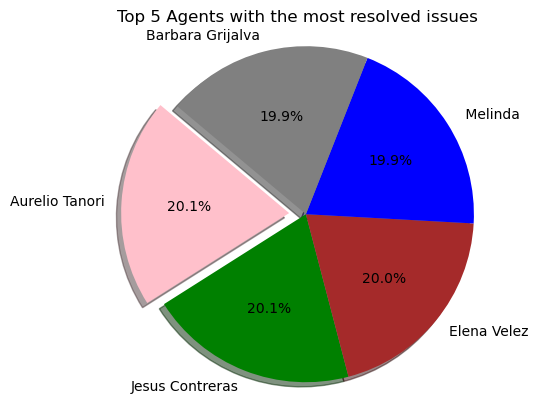

In [114]:
query = """
SELECT a."Agent ID", a."Name" || ' ' || a."Last Name" AS "Full Names", COUNT(*) AS "Resolved Issues Count"
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
WHERE d."Resolution Time (Days)" >= 0 -- Assuming non-negative values indicate resolved issues
GROUP BY a."Agent ID", "Full Names"
ORDER BY "Resolved Issues Count" DESC
LIMIT 5;
"""
top_agents_with_resolved_issues = pd.read_sql_query(query, connection)

labels = top_agents_with_resolved_issues["Full Names"]
sizes = top_agents_with_resolved_issues["Resolved Issues Count"]
colors = ['pink', 'green', 'brown', 'blue', 'grey']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
plt.axis('equal') 
plt.title('Top 5 Agents with the most resolved issues')
plt.show()

- Based on this analysis I noticed that Agent ID: 48 Aurelio Tanori resolved a total of 2027 issues followed by Agent ID:39, Jesus Contreras with a total of 2026

#### What are the most common request categories?

In [107]:
%%sql

SELECT "Request Category", COUNT(*) AS "Number of Tickets"
FROM data
GROUP BY "Request Category"
ORDER BY "Number of Tickets" DESC;

 * sqlite:///demo.db
Done.


Request Category,Number of Tickets
System,39002
Login Access,29193
Software,19570
Hardware,9733


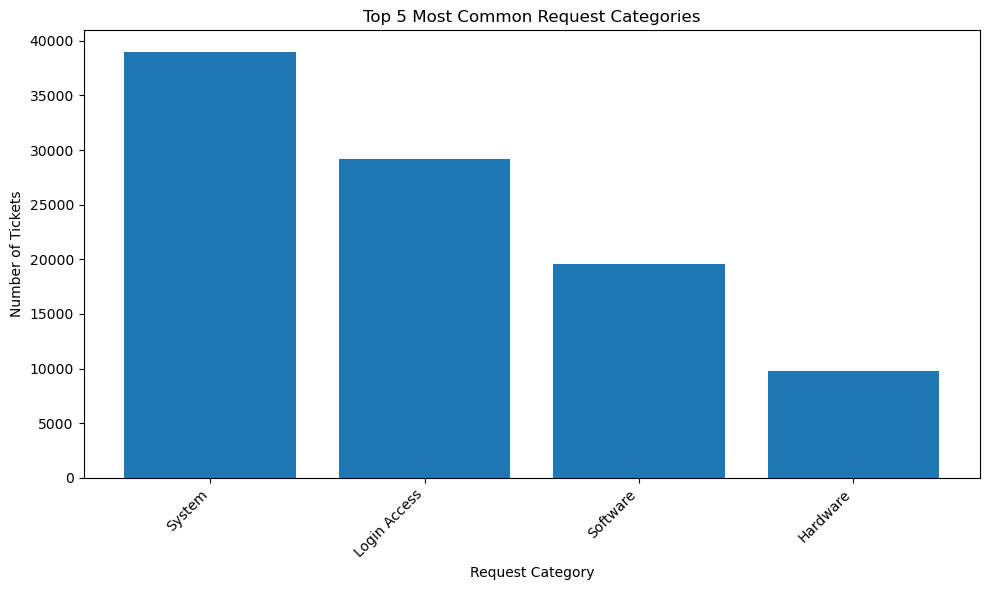

In [59]:
query = """
SELECT "Request Category", COUNT(*) AS "Number of Tickets"
FROM data
GROUP BY "Request Category"
ORDER BY "Number of Tickets" DESC
LIMIT 5;
"""
top_categories = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.bar(top_categories['Request Category'], top_categories['Number of Tickets'])
plt.xlabel('Request Category')
plt.ylabel('Number of Tickets')
plt.title('Top 5 Most Common Request Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

It is observed that The "System" category had the highest number of tickets, totaling 39,002. Following closely, "Login Access" garnered 29,193 tickets, while "Software" and "Hardware" accounted for 19,570 and 9,733 tickets respectively.

#### What is the average resolution time for each severity level?

In [61]:
%%sql

SELECT "Severity", AVG("Resolution Time (Days)") AS "Average Resolution Time"
FROM data
GROUP BY "Severity"
ORDER BY "Severity" DESC;

 * sqlite:///demo.db
Done.


Severity,Average Resolution Time
4 - Urgent,2.0014367816091956
3 - Mayor,3.9079818031430933
2 - Normal,4.663609907958852
1 - Minor,3.4353410097431354
0 - Unclasified,2.8764044943820224


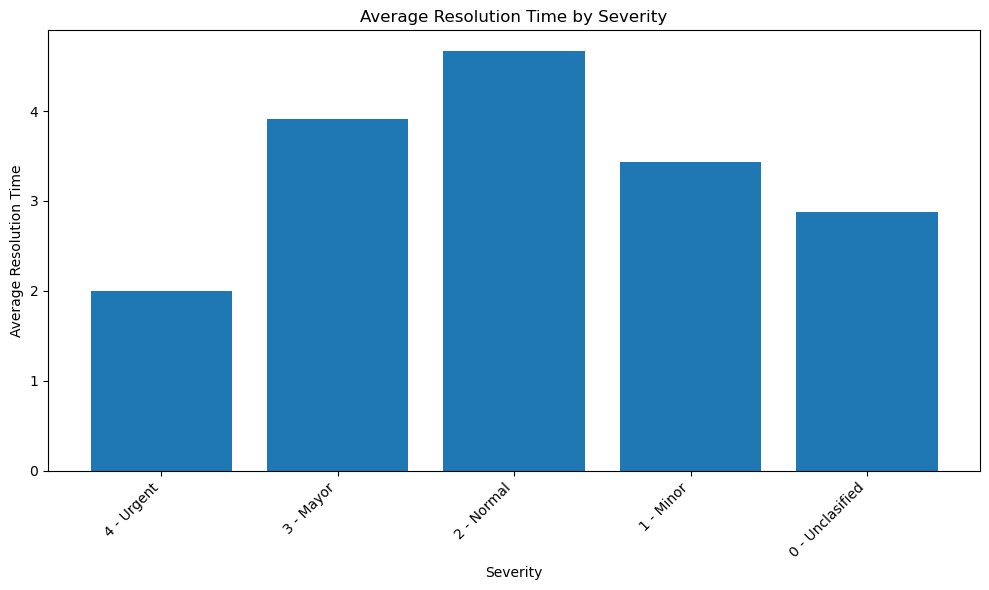

In [63]:
query = """
SELECT "Severity", AVG("Resolution Time (Days)") AS "Average Resolution Time"
FROM data
GROUP BY "Severity"
ORDER BY "Severity" DESC;
"""

average_resolution_time = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.bar(average_resolution_time['Severity'], average_resolution_time['Average Resolution Time'])
plt.xlabel('Severity')
plt.ylabel('Average Resolution Time')
plt.title('Average Resolution Time by Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

This analysis reveals that - The severity level "4 - Urgent" has the shortest average resolution time at approximately 2.00 days.
while "3 - Major" issues take around 3.91 days to resolve on average. 
For "2 - Normal" severity issues, the average resolution time extends to about 4.66 days. "1 - Minor" severity issues are resolved in an average of 3.44 days.....

This pattern suggests that the Agents prioritizes and expedites the resolution of 'urgent' issues, resulting in a shorter turnaround time. On the other hand, issues with lower severity levels (higher numerical values) are given a relatively longer time for resolution

#### Satisfaction Rate Group 

In [125]:
%%sql

SELECT
    
    COUNT(d."Satisfaction Rate") AS "Total Satisfaction Rate", 
    CASE
        WHEN d."Satisfaction Rate" == 5 THEN 'Very Satisfactory'
        WHEN d."Satisfaction Rate" == 4 THEN 'Satisfactory'
        WHEN d."Satisfaction Rate" == 3 THEN 'Fair'
        WHEN d."Satisfaction Rate" == 2 THEN 'Neutral'
        ELSE 'Unsatisfactory' 
    END AS Satisfaction_rate_group
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
GROUP BY Satisfaction_rate_group
ORDER BY Satisfaction_rate_group DESC;

 * sqlite:///demo.db
Done.


Total Satisfaction Rate,Satisfaction_rate_group
50770,Very Satisfactory
9907,Unsatisfactory
27562,Satisfactory
1977,Neutral
7282,Fair


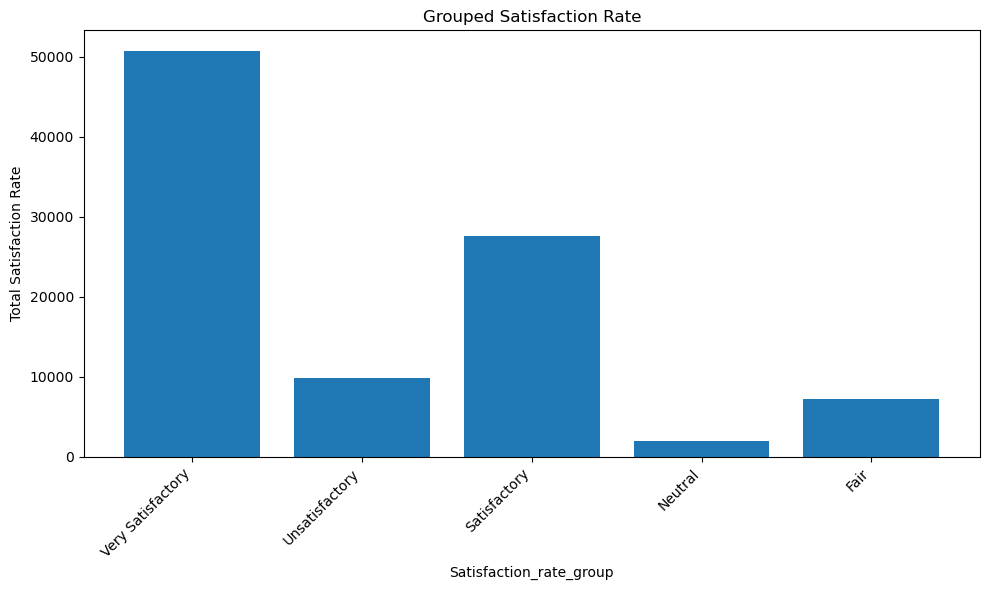

In [156]:
query = """
SELECT
    
    COUNT(d."Satisfaction Rate") AS "Total Satisfaction Rate", 
    CASE
        WHEN d."Satisfaction Rate" == 5 THEN 'Very Satisfactory'
        WHEN d."Satisfaction Rate" == 4 THEN 'Satisfactory'
        WHEN d."Satisfaction Rate" == 3 THEN 'Fair'
        WHEN d."Satisfaction Rate" == 2 THEN 'Neutral'
        ELSE 'Unsatisfactory' 
    END AS Satisfaction_rate_group
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
GROUP BY Satisfaction_rate_group
ORDER BY Satisfaction_rate_group DESC;
"""

satisfaction_rate_grouped = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.bar(satisfaction_rate_grouped['Satisfaction_rate_group'],satisfaction_rate_grouped['Total Satisfaction Rate'])
plt.xlabel('Satisfaction_rate_group')
plt.ylabel('Total Satisfaction Rate')
plt.title('Grouped Satisfaction Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Based on the dataset, it appears that the majority of our customers are satisfied. The "Very Satisfactory" and "Satisfactory" categories together account for a significant portion of the total satisfaction rate. This suggests that a substantial number of users have rated their experience positively. 

However, it's also important to consider the "Unsatisfactory," "Neutral," and "Fair" categories, as they represent cases where improvements might be needed to ensure a consistently high level of customer satisfaction.

#### Top 5 Agents with the highest average satisfaction rate?

In [115]:
%%sql

SELECT a."Agent ID", a."Name" || ' ' || a."Last Name" AS "Full Names", AVG(d."Satisfaction Rate") AS "Average Satisfaction Rate"
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
GROUP BY a."Agent ID", a."Last Name"
ORDER BY AVG(d."Satisfaction Rate") DESC
LIMIT 5;

 * sqlite:///demo.db
Done.


Agent ID,Full Names,Average Satisfaction Rate
34,Diana Rojo,4.596782563570317
12,Javier Davila,4.489720611491829
2,Jesus Grajeda,4.473577235772358
15,Galindo Guadalupe,4.471622300351582
29,Segura Garcia,4.461418953909892


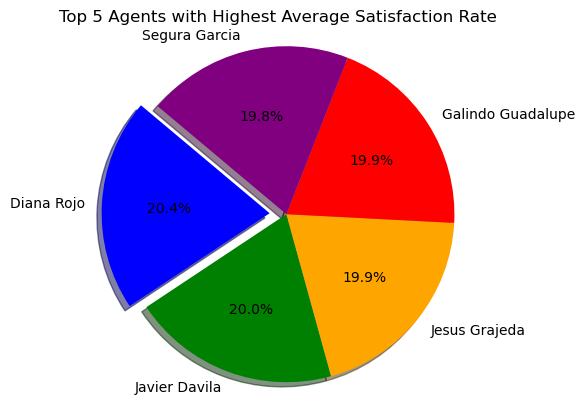

In [117]:
query = """
SELECT a."Agent ID", a."Name" || ' ' || a."Last Name" AS "Full Names", AVG(d."Satisfaction Rate") AS "Average Satisfaction Rate"
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
GROUP BY a."Agent ID", a."Last Name"
ORDER BY AVG(d."Satisfaction Rate") DESC
LIMIT 5;
"""
top_agents_satisfaction = pd.read_sql_query(query, connection)

labels = top_agents_satisfaction["Full Names"]
sizes = top_agents_satisfaction["Average Satisfaction Rate"]
colors = ['blue', 'green', 'orange', 'red', 'purple']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
plt.axis('equal') 
plt.title('Top 5 Agents with Highest Average Satisfaction Rate')
plt.show()

##### These agents have consistently received high average satisfaction ratings from customers, indicating that they have provided quality service and have been successful in meeting customer expectations.

#### In which months do the help desk tickets peak the most?

In [102]:
%%sql

SELECT
    strftime('%m', Date_ticket_created) AS Month_Number,
    CASE
        WHEN strftime('%m', Date_ticket_created) == '01' THEN 'January'
        WHEN strftime('%m', Date_ticket_created) == '02' THEN 'February'
        WHEN strftime('%m', Date_ticket_created) == '03' THEN 'March'
        WHEN strftime('%m', Date_ticket_created) == '04' THEN 'April'
        WHEN strftime('%m', Date_ticket_created) == '05' THEN 'May'
        WHEN strftime('%m', Date_ticket_created) == '06' THEN 'June'
        WHEN strftime('%m', Date_ticket_created) == '07' THEN 'July'
        WHEN strftime('%m', Date_ticket_created) == '08' THEN 'August'
        WHEN strftime('%m', Date_ticket_created) == '09' THEN 'September'
        WHEN strftime('%m', Date_ticket_created) == '10' THEN 'October'
        WHEN strftime('%m', Date_ticket_created) == '11' THEN 'November'
        ELSE 'December'
    END AS Month_Name,
    COUNT(*) AS Peak_Period
FROM data
GROUP BY Month_Name
ORDER BY Peak_Period DESC;

 * sqlite:///demo.db
Done.


Month_Number,Month_Name,Peak_Period
10,October,8495
08,August,8489
12,December,8401
11,November,8254
03,March,8228
09,September,8219
06,June,8141
05,May,8121
07,July,8070
04,April,7937


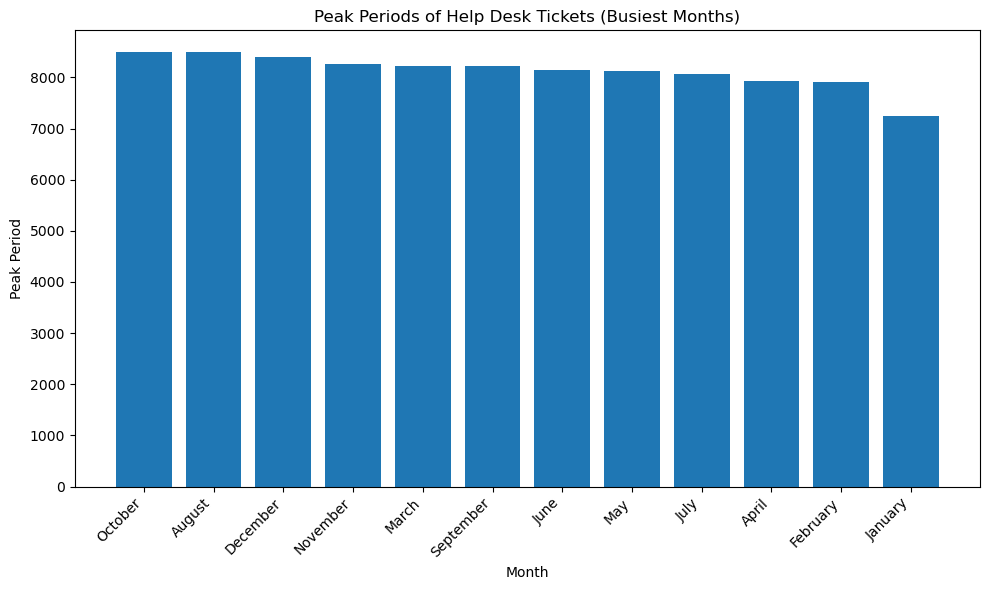

In [71]:
query = """
SELECT
    strftime('%m', Date_ticket_created) AS Month_Number,
    CASE
        WHEN strftime('%m', Date_ticket_created) == '01' THEN 'January'
        WHEN strftime('%m', Date_ticket_created) == '02' THEN 'February'
        WHEN strftime('%m', Date_ticket_created) == '03' THEN 'March'
        WHEN strftime('%m', Date_ticket_created) == '04' THEN 'April'
        WHEN strftime('%m', Date_ticket_created) == '05' THEN 'May'
        WHEN strftime('%m', Date_ticket_created) == '06' THEN 'June'
        WHEN strftime('%m', Date_ticket_created) == '07' THEN 'July'
        WHEN strftime('%m', Date_ticket_created) == '08' THEN 'August'
        WHEN strftime('%m', Date_ticket_created) == '09' THEN 'September'
        WHEN strftime('%m', Date_ticket_created) == '10' THEN 'October'
        WHEN strftime('%m', Date_ticket_created) == '11' THEN 'November'
        ELSE 'December'
    END AS Month_Name,
    COUNT(*) AS Peak_Period
FROM data
GROUP BY Month_Number, Month_Name
ORDER BY Peak_Period DESC;
"""

help_desk_tickets_peak_period = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.bar(help_desk_tickets_peak_period['Month_Name'], help_desk_tickets_peak_period['Peak_Period'])
plt.xlabel('Month')
plt.ylabel('Peak Period')
plt.title('Peak Periods of Help Desk Tickets (Busiest Months)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

The months in which the help desk tickets peak the most are as follows based on the dataset:

- October with a peak period of 8495 tickets.
- August with a peak period of 8489 tickets.
- December with a peak period of 8401 tickets.
- November with a peak period of 8254 tickets.
- March with a peak period of 8228 tickets.

These months show the highest number of help desk tickets, indicating that these periods experience the highest demand for IT support and assistance. 

It could be valuable for the IT team to be prepared for increased ticket volumes during these months to ensure timely and efficient customer service.

#### What are the top most common issue types?

In [74]:
%%sql

SELECT "Issue Type", COUNT(*) AS "Number of Tickets"
FROM data
GROUP BY "Issue Type"
ORDER BY "Number of Tickets" DESC
LIMIT 3;

 * sqlite:///demo.db
Done.


Issue Type,Number of Tickets
IT Request,73220
IT Error,24278


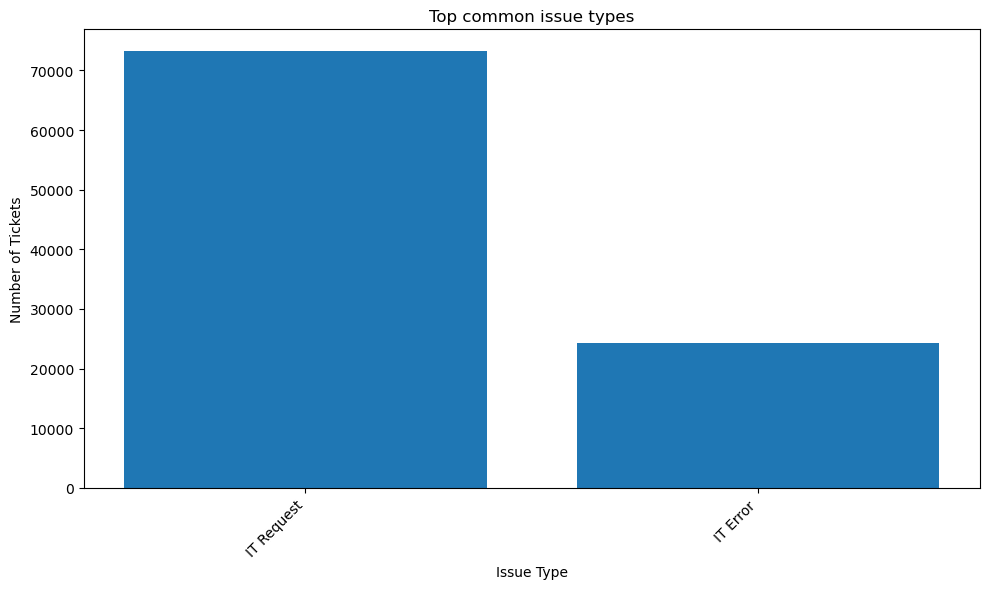

In [76]:
query = """
SELECT "Issue Type", COUNT(*) AS "Number of Tickets"
FROM data
GROUP BY "Issue Type"
ORDER BY "Number of Tickets" DESC
LIMIT 3;
"""

most_common_issue_types = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.bar(most_common_issue_types['Issue Type'], most_common_issue_types['Number of Tickets'])
plt.xlabel('Issue Type')
plt.ylabel('Number of Tickets')
plt.title('Top common issue types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

##### The most common issue type is the "IT Request" with about 73220 number of Tickets raised

#### Correlation between Customer Satisfaction and the Agent's Resolutions Days & Resolved Issues

In [141]:
%%sql

SELECT a."Agent ID", a."Name" || ' ' || a."Last Name" AS "Full Names",
       AVG(d."Resolution Time (Days)") AS "Resolutions Days",
       AVG(d."Satisfaction Rate") AS "Average Satisfaction Rate",
       COUNT(*) AS "Resolved Issues Count"
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
WHERE d."Resolution Time (Days)" >= 0
GROUP BY a."Agent ID", "Full Names"
ORDER BY "Resolved Issues Count" DESC
LIMIT 8;


 * sqlite:///demo.db
Done.


Agent ID,Full Names,Resolutions Days,Average Satisfaction Rate,Resolved Issues Count
48,Aurelio Tanori,4.514553527380365,4.407992106561421,2027
39,Jesus Contreras,5.554787759131293,4.34452122408687,2026
3,Elena Velez,5.381989114299851,3.6150420583869374,2021
35,Melinda,4.3692077727952165,4.3991031390134525,2007
24,Barbara Grijalva,4.227159261108337,4.441337993010484,2003
5,Willyberto Gonzales,4.259,4.376,2000
15,Galindo Guadalupe,3.6559517830236063,4.471622300351582,1991
4,Barraza Alberto,5.243963782696177,4.187625754527163,1988


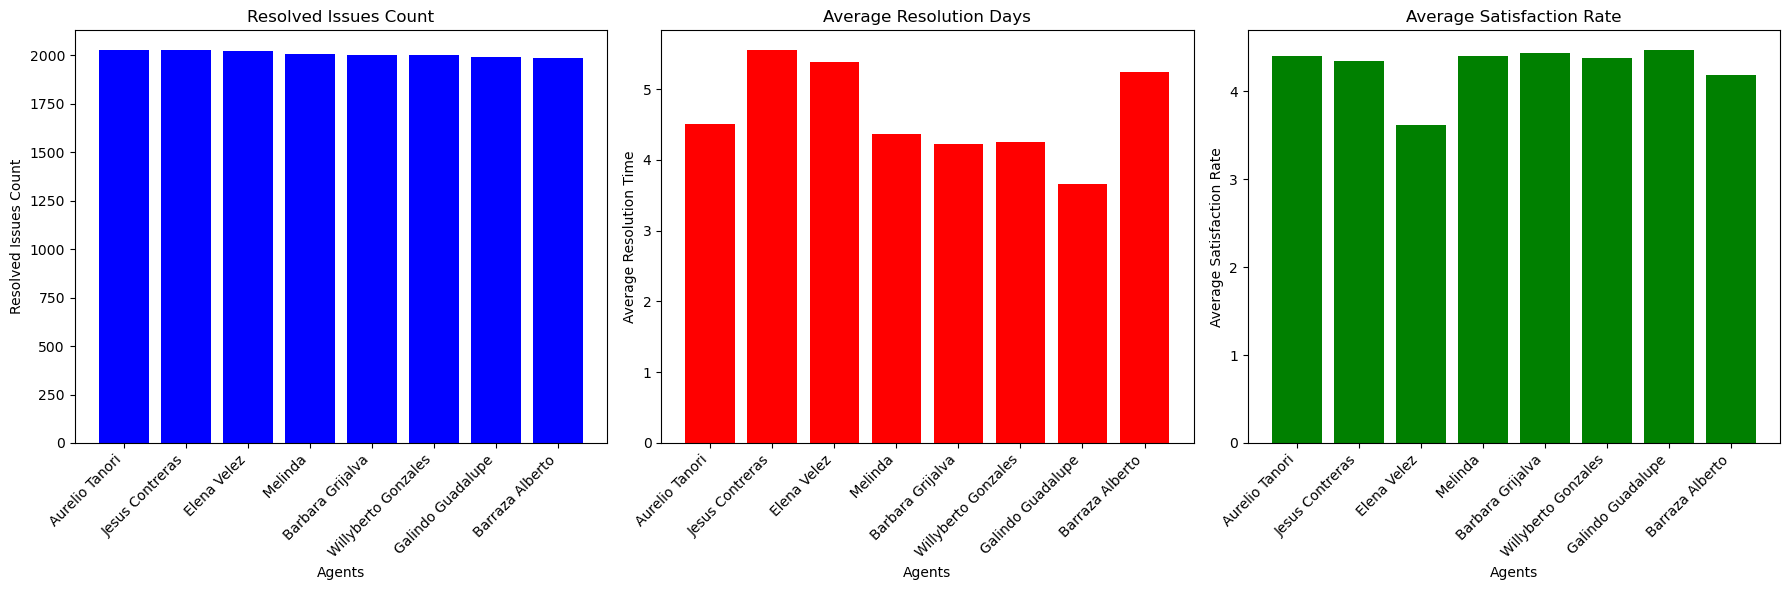

In [147]:
query = """
SELECT a."Agent ID", a."Name" || ' ' || a."Last Name" AS "Full Names",
       AVG(d."Resolution Time (Days)") AS "Resolutions Days",
       AVG(d."Satisfaction Rate") AS "Average Satisfaction Rate",
       COUNT(*) AS "Resolved Issues Count"
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
WHERE d."Resolution Time (Days)" >= 0
GROUP BY a."Agent ID", "Full Names"
ORDER BY "Resolved Issues Count" DESC
LIMIT 8;
"""

result_df = pd.read_sql_query(query, connection)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#Resolved Issues Count
axs[0].bar(result_df['Full Names'], result_df['Resolved Issues Count'], color='blue')
axs[0].set_title('Resolved Issues Count')
axs[0].set_xlabel('Agents')
axs[0].set_ylabel('Resolved Issues Count')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xticklabels(result_df['Full Names'], ha='right')

# Average Resolution Time
axs[1].bar(result_df['Full Names'], result_df['Resolutions Days'], color='red')
axs[1].set_title('Average Resolution Days')
axs[1].set_xlabel('Agents')
axs[1].set_ylabel('Average Resolution Time')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xticklabels(result_df['Full Names'], ha='right')

# Average Satisfaction Rate
axs[2].bar(result_df['Full Names'], result_df['Average Satisfaction Rate'], color='green')
axs[2].set_title('Average Satisfaction Rate')
axs[2].set_xlabel('Agents')
axs[2].set_ylabel('Average Satisfaction Rate')
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_xticklabels(result_df['Full Names'], ha='right')

plt.tight_layout()
plt.show()

- 5 top agents with the highest resolved issues counts are Aurelio Tanori, Jesus Contreras, and Elena Velez, with 2027, 2026, and 2021 resolved issues, respectively. These agents have shown exceptional dedication to addressing customer concerns.

- While Aurelio Tanori has the highest resolved issues count, his average resolution time is 4.51 days, which is relatively lower compared to some other agents.

- Jesus Contreras, who has the second-highest resolved issues count, has an average resolution time of 5.55 days. This suggests that while he resolves a high number of issues, it takes slightly longer to resolve them.

- Elena Velez has a similar trend, with a resolved issues count of 2021 and an average resolution time of 5.38 days. This might indicate that these agents prioritize thorough resolution, potentially contributing to their slightly longer resolution times.

- Galindo Guadalupe stands out with an average satisfaction rate of 4.47 and lower resolution days, suggesting that customers are highly satisfied with his service.

- This indicates a positive correlation between customer satisfaction and the agent's performance.

#### Agents' Satisfaction Rate Trends Over the Years?

In [77]:
%%sql

SELECT strftime('%Y', Date_ticket_created) AS Year,
       AVG("Satisfaction Rate") AS Average_Satisfaction_Rate
FROM data
GROUP BY Year
ORDER BY Year;

 * sqlite:///demo.db
Done.


Year,Average_Satisfaction_Rate
2016,3.979695042525477
2017,4.068119342943346
2018,4.091853962224333
2019,4.1223825034899955
2020,4.161269251925193


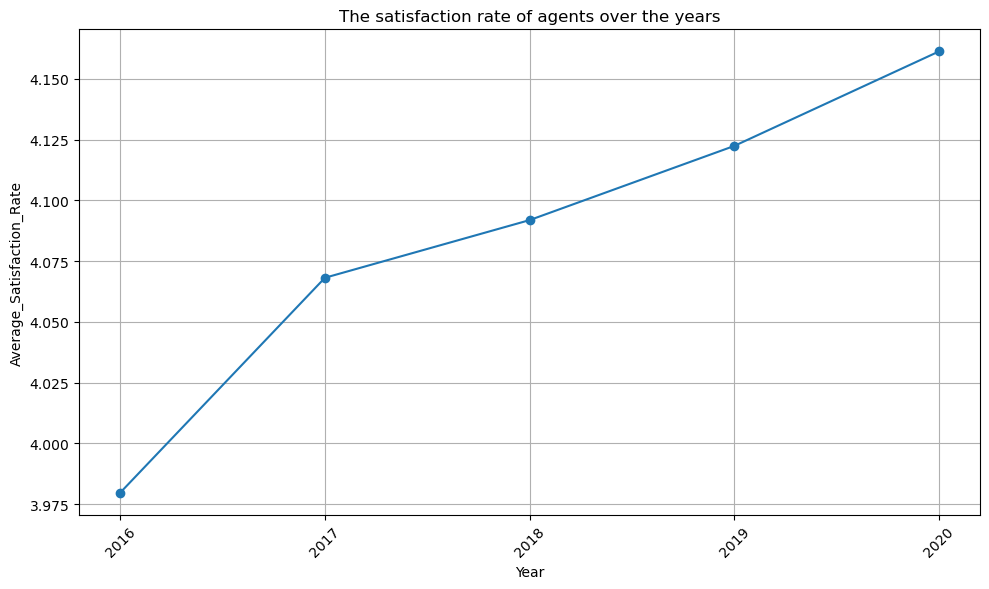

In [146]:

query = """
SELECT strftime('%Y', Date_ticket_created) AS Year,
       AVG("Satisfaction Rate") AS Average_Satisfaction_Rate
FROM data
GROUP BY Year
ORDER BY Year;
"""

satisfaction_rate_of_agents = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.plot(satisfaction_rate_of_agents['Year'], satisfaction_rate_of_agents['Average_Satisfaction_Rate'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average_Satisfaction_Rate')
plt.title('The satisfaction rate of agents over the years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

- In the past five years (2016-2020),it is evident that agents' average satisfaction rates have shown a consistent upward trend over time.

- In 2016, the average satisfaction rate was 3.98, which indicates a moderate level of satisfaction among customers.

- By the year 2020, the average satisfaction rate reached its peak at 4.16. This indicates that, on average, customers have become more satisfied with the help desk services provided by agents.

####  Help Desk Ticket Trends Over the Years

In [128]:
%%sql

SELECT strftime('%Y', "Date_ticket_created") AS "Year", COUNT(*) AS "Number of Tickets"
FROM data
GROUP BY "Year"
ORDER BY "Year";


 * sqlite:///demo.db
Done.


Year,Number of Tickets
2016,13051
2017,14915
2018,18954
2019,21490
2020,29088


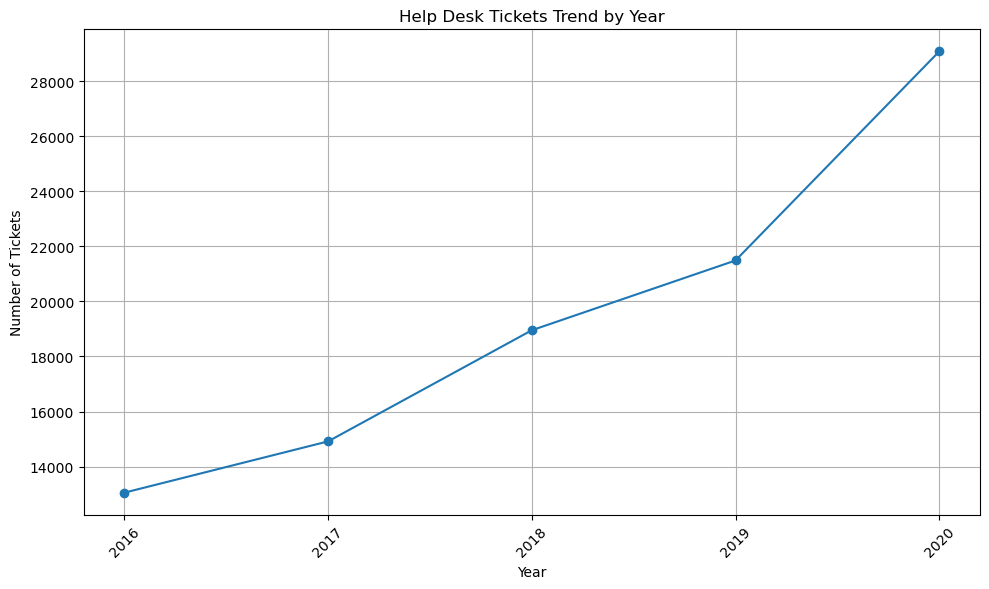

In [129]:
query = """
SELECT strftime('%Y', "Date_ticket_created") AS "Year", COUNT(*) AS "Number of Tickets"
FROM data
GROUP BY "Year"
ORDER BY "Year";
"""

tickets_by_year = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.plot(tickets_by_year['Year'], tickets_by_year['Number of Tickets'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Tickets')
plt.title('Help Desk Tickets Trend by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

- In 2016, about 13,051 was tickets raised, and this number steadily increased over the subsequent years.

- By 2020, the number of tickets raised had significantly escalated to 29,088. 

- This growth in ticket volume indicates an increasing reliance on the help desk services provided by the organization.

- The trend suggests that customers are becoming more proactive in seeking assistance and reporting issues, which could be due to several factors such as the expansion of services, increased customer awareness, or the organization's emphasis on efficient issue resolution.

#### How does Average Satisfaction Rate vary among employee age_group

In [151]:
%%sql

SELECT
    
    AVG(d."Satisfaction Rate") AS "Average Satisfaction Rate",
    CASE
        WHEN a."Age" BETWEEN 24 AND 29 THEN 'Youngsters'
        WHEN a."Age" BETWEEN 30 AND 34 THEN 'Mid_year'
        WHEN a."Age" BETWEEN 35 AND 39 THEN 'Middle_life'
        WHEN a."Age" BETWEEN 40 AND 44 THEN 'Elders'
        ELSE 'Seniors' 
    END AS Age_group
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
GROUP BY Age_group
ORDER BY Age_group DESC;

 * sqlite:///demo.db
Done.


Average Satisfaction Rate,Age_group
4.2308368108939165,Youngsters
4.1580329782576975,Seniors
4.023065406568729,Middle_life
3.9394895115153292,Mid_year
4.0779372030187275,Elders


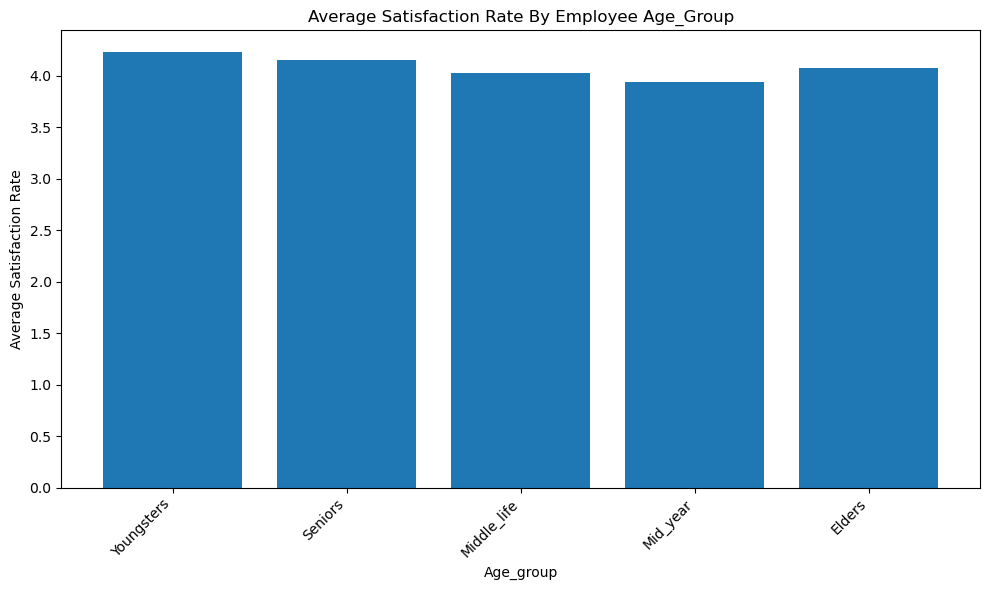

In [152]:
query = """
SELECT
    
    AVG(d."Satisfaction Rate") AS "Average Satisfaction Rate",
    CASE
        WHEN a."Age" BETWEEN 24 AND 29 THEN 'Youngsters'
        WHEN a."Age" BETWEEN 30 AND 34 THEN 'Mid_year'
        WHEN a."Age" BETWEEN 35 AND 39 THEN 'Middle_life'
        WHEN a."Age" BETWEEN 40 AND 44 THEN 'Elders'
        ELSE 'Seniors' 
    END AS Age_group
FROM agents a
JOIN data d ON a."Agent ID" = d."Agent ID"
GROUP BY Age_group
ORDER BY Age_group DESC;
"""

avg_satisfaction_rate_by_employee_age_group = pd.read_sql_query(query, connection)

plt.figure(figsize=(10, 6))
plt.bar(avg_satisfaction_rate_by_employee_age_group['Age_group'], avg_satisfaction_rate_by_employee_age_group['Average Satisfaction Rate'])
plt.xlabel('Age_group')
plt.ylabel('Average Satisfaction Rate')
plt.title('Average Satisfaction Rate By Employee Age_Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

- Based on the dataset provided, the average satisfaction rate is relatively higher for the "Youngsters" and "Seniors" age groups, while it's slightly lower for the "Middle Life," "Mid Year," and "Elders" age groups. 

- This could indicate that younger and older employees tend to have higher satisfaction rates compared to those in the middle age groups.